In [1]:
import pandas as pd
import numpy as np
import sys
from anndata import AnnData
import scanpy as sc
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
import spatialcorr

In [2]:
from spatialdm.datasets import dataset
adata = dataset.melanoma()
adata

/home/yoyo/miniconda2/envs/CC/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 293 × 16148
    obs: 'B', 'CAF', 'Endo', 'Macro', 'Melanoma or unclassified', 'NK', 'T'
    obsm: 'spatial'

In [3]:
adata.obs['cluster'] = adata.obs.idxmax(1)
adata.obs['row'] = adata.obsm['spatial'][:,0]
adata.obs['col'] = adata.obsm['spatial'][:,1]

In [7]:
# real mel data
extract_lr(adata, 'human', min_cell=3)      # find overlapping LRs from CellChatDB

db = pd.merge(adata.uns['ligand'],adata.uns['receptor'], left_index=True, right_index=True)

pval_ls = []

for i in db.index:    
    l = db.loc[i].dropna()
    if (adata[:,l].X != np.repeat(adata[:,l].X.mean(1), len(l)).reshape(293,-1)).sum()>0:

        res=spatialcorr.run_test(adata,
                                 np.hstack((l)),
                                 bandwidth=4)
        pval_ls.append(res[0])
    else:
        pval_ls.append(1)

In [163]:
neg =pd.read_csv('/home/yoyo/1_spatial/1_Tumor/neg_summary0725.csv')
neg

,ligand,receptor,giotto,CC,CC_trun,ST,Moran,z
0,TGFB1,ITGA6,0.008,1.0,0.05,0.061,0.857,0.902395
1,TGFB3,CD4,0.016,1.0,0.02,0.086,0.068,0.054321
2,TGFB1,ITGA3,0.028,0.0,0.00,0.000,0.008,0.003366
3,TGFB3,FZD4,0.012,1.0,0.15,0.078,0.835,0.819534
4,TGFB3,ITGA3,0.124,1.0,0.00,0.091,0.119,0.106386
...,...,...,...,...,...,...,...,...
658,SIGLEC1,EPHA2,0.116,1.0,0.00,0.000,1.000,0.999974
659,THY1,FZD1,0.086,1.0,0.03,0.000,0.636,0.762649
660,THY1,ITGA8,0.126,1.0,0.00,0.144,0.446,0.417918
661,ITGA4,CD244,0.052,1.0,0.00,1.000,0.813,0.737211


In [31]:
# adata.obs=pd.merge(adata.obs, ct_to_int.rename_axis('cluster'), left_on='cluster', right_index=True)

### simulated data

In [99]:
import anndata as ann
db = pd.read_csv('/home/yoyo/1_spatial/7_SVCA/melanoma/db_tbl2.csv', index_col=0)
nul = pd.read_csv('/home/yoyo/1_spatial/7_SVCA/melanoma/data/nul/NUL_data_noneg.csv', 
                 index_col=0)
bdata = ann.AnnData(nul.transpose())

/tmp/ipykernel_62225/2350743365.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = ann.AnnData(nul.transpose())


In [ ]:
pval_ls = []

for i in db.index[533:]:
    l = db.loc[i].dropna()
    res=spatialcorr.run_test(bdata,
                             np.hstack((l)),
                             bandwidth=4)
    pval_ls.append(res[0])

In [131]:
half = pd.read_csv('/home/yoyo/1_spatial/7_SVCA/melanoma/neg2pos/half/HALF_neg2pos.csv', 
                 index_col=0)

In [132]:
half = ann.AnnData(half.transpose())

/tmp/ipykernel_62225/4225884094.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  half = ann.AnnData(half.transpose())


In [133]:
half.obs = adata.obs
half.obsm = adata.obsm
half.uns = adata.uns

In [134]:
pval_half = []
for i in db.index:
    l = db.loc[i].dropna()
    res=spatialcorr.run_test(half,
                             np.hstack((l)),
                             bandwidth=4)
    pval_half.append(res[0])

Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 167. P-value = 0.11976047904191617
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 51. P-value = 0.39215686274509803
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 48. P-value = 0.4166666666666667
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 44. P-value = 0.45454545454545453
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0003
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 8787. P-value = 0.0022760896779333104
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 773. P-value = 0.0258732212160414
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0006
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutati

Number of nulls > obs has hit threshold of 20. Total permutations used: 465. P-value = 0.043010752688172046
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 246. P-value = 0.08130081300813008
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 119. P-value = 0.16806722689075632
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 130. P-value = 0.15384615384615385
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 101. P-value = 0.19801980198019803
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 86. P-value = 0.23255813953488372
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0002
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 21. P-va

Number of nulls > obs has hit threshold of 20. Total permutations used: 852. P-value = 0.023474178403755867
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 55. P-value = 0.36363636363636365
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 66. P-value = 0.30303030303030304
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 596. P-value = 0.03355704697986577
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 504. P-value = 0.03968253968253968
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 20. P-value = 1.0
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0003
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 111. P-value = 0.18018018018018017
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Tot

Number of nulls > obs has hit threshold of 20. Total permutations used: 21. P-value = 0.9523809523809523
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 61. P-value = 0.32786885245901637
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0013
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 44. P-value = 0.45454545454545453
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 28. P-value = 0.7142857142857143
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 69. P-value = 0.2898550724637681
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 173. P-value = 0.11560693641618497
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 164. P-value = 0.12195121951219512
Kept 293/293 spots.
Number of nulls > obs has hit threshold 

Number of nulls > obs has hit threshold of 20. Total permutations used: 22. P-value = 0.9090909090909091
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 474. P-value = 0.04219409282700422
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 174. P-value = 0.11494252873563218
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 23. P-value = 0.8695652173913043
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 54. P-value = 0.37037037037037035
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 141. P-value = 0.14184397163120568
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 23. P-value =

Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 20. P-value = 1.0
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 423. P-value = 0.04728132387706856
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 546. P-value = 0.03663003663003663
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 191. P-value = 0.10471204188481675
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 37. P-value = 0.5405405405405406
Kept 293/

Number of nulls > obs has hit threshold of 20. Total permutations used: 4670. P-value = 0.004282655246252677
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 75. P-value = 0.26666666666666666
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0003
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0017
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0006
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 3126. P-value = 0.006397952655150352
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 32. P-value = 0.625
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 41. P-value = 0.4878048780487805
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 53. P-value = 0.37735849056603776
Kept 293/293 spots.
Hit maximum perm

Number of nulls > obs has hit threshold of 20. Total permutations used: 42. P-value = 0.47619047619047616
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 22. P-value = 0.9090909090909091
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 42. P-value = 0.47619047619047616
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0003
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 65. P-value = 0.3076923076923077
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 1811. P-value = 0.011043622308117063
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0

Number of nulls > obs has hit threshold of 20. Total permutations used: 74. P-value = 0.2702702702702703
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 22. P-value = 0.9090909090909091
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 188. P-value = 0.10638297872340426
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 5341. P-value = 0.003744617112900206
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 51. P-value = 0.39215686274509803
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0012
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 30. P-value = 0.6666666666666666
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 27. P-value =

Number of nulls > obs has hit threshold of 20. Total permutations used: 116. P-value = 0.1724137931034483
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 237. P-value = 0.08438818565400844
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 4993. P-value = 0.004005607850991388
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 7544. P-value = 0.002651113467656416
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 289. P-value = 0.06920415224913495
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.002
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 210. P-value = 0.09523809523809523
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 407. P-value = 0.04914004914004914
Kept 293/293 spots.
Number of nulls > obs has hit 

Number of nulls > obs has hit threshold of 20. Total permutations used: 129. P-value = 0.15503875968992248
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 53. P-value = 0.37735849056603776
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 43. P-value = 0.46511627906976744
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 291. P-value = 0.06872852233676977
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 26. P-value = 0.7692307692307693
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 61. P-value = 0.32786885245901637
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 708. P-value = 0.02824858757062147
Kept 293/293 spots.
Number of nulls > obs has hit thresho

Number of nulls > obs has hit threshold of 20. Total permutations used: 658. P-value = 0.030395136778115502
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 430. P-value = 0.046511627906976744
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 252. P-value = 0.07936507936507936
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 170. P-value = 0.11764705882352941
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 1288. P-value = 0.015527950310559006
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 169. P-value = 0.11834319526627218
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 2944. P-value = 0.006793478260869565
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has 

Number of nulls > obs has hit threshold of 20. Total permutations used: 68. P-value = 0.29411764705882354
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 59. P-value = 0.3389830508474576
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 543. P-value = 0.03683241252302026
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 20. P-value = 1.0
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 241. P-value = 0.08298755186721991
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 23. P-value = 0.8695652173913043
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 24. P-value = 0.8333333333333334
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 156. P-value = 0.1282051282051282
Kept 293/293 spots.
Number of

Number of nulls > obs has hit threshold of 20. Total permutations used: 96. P-value = 0.20833333333333334
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 543. P-value = 0.03683241252302026
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 46. P-value = 0.43478260869565216
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 616. P-value = 0.032467532467532464
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 154. P-value = 0.12987012987012986
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 146. P-value = 0.136986301369863
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 43. P-value = 0.46511627906976744
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0003
Kept 293/293 spots.
Number of nulls > obs has hit thresh

Number of nulls > obs has hit threshold of 20. Total permutations used: 31. P-value = 0.6451612903225806
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 413. P-value = 0.048426150121065374
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 746. P-value = 0.02680965147453083
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 35. P-value = 0.5714285714285714
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 441. P-value = 0.045351473922902494
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 404. P-value = 0.04950495049504951
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit

Number of nulls > obs has hit threshold of 20. Total permutations used: 48. P-value = 0.4166666666666667
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 325. P-value = 0.06153846153846154
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 133. P-value = 0.15037593984962405
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 20. P-value = 1.0
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0003
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 373. P-value = 0.05361930294906166
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 52. P-value = 0.38461538461538464
Kept 293/293 spots.
Hit maximum permutati

Number of nulls > obs has hit threshold of 20. Total permutations used: 834. P-value = 0.023980815347721823
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 1358. P-value = 0.014727540500736377
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0004
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0002
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 2489. P-value = 0.008035355564483728
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0012
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 150. P-value = 0.13333333333333333
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 671. P-value = 0.029806259314456036
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 

In [135]:
full = pd.read_csv('/home/yoyo/1_spatial/7_SVCA/melanoma/neg2pos/full/FULL_neg2pos.csv', 
                 index_col=0)

In [136]:
full = ann.AnnData(full.transpose())

/tmp/ipykernel_62225/2474686742.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  full = ann.AnnData(full.transpose())


In [137]:
full.obs = adata.obs
full.obsm = adata.obsm
full.uns = adata.uns

In [138]:
pval_full = []
for i in db.index:
    l = db.loc[i].dropna()
    res=spatialcorr.run_test(full,
                             np.hstack((l)),
                             bandwidth=4)
    pval_full.append(res[0])

Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 292. P-value = 0.0684931506849315
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 331. P-value = 0.06042296072507553
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0005
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0011
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 3946. P-value = 0.00506842372022301
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 2857. P-value = 0.007000350017500875
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0008
Kept 293/293 spo

Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0015
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0005
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0007
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0016
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 3030. P-value = 0.006600660066006601
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 545. P-value = 0.03669724770642202
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit thr

Number of nulls > obs has hit threshold of 20. Total permutations used: 1789. P-value = 0.011179429849077696
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 351. P-value = 0.05698005698005698
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 491. P-value = 0.04073319755600815
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 68. P-value = 0.29411764705882354
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 40. P-value = 0.5
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0002
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0018
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 36. P-value = 0.5555555555555556
Kept 293/293 spots.
Hit maximum permutat

Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0003
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0003
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 1280. P-value = 0.015625
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 1926. P-value = 0.010384215991692628
Kept 293/293 spots.
Hit maximum permutation

Number of nulls > obs has hit threshold of 20. Total permutations used: 109. P-value = 0.1834862385321101
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 265. P-value = 0.07547169811320754
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 70. P-value = 0.2857142857142857
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0016
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/2

Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0003
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 

Hit maximum permutations threshold of 20. P-value = 0.0005
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 2160. P-value = 0.009259259259259259
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 8574. P-value = 0.002332633543270352
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 31. P-value = 0.6451612903225806
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0004
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 

Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0003
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 54. P-value = 0.37037037037037035
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0018
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 121. P-value = 0.1652892561983471
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of

Number of nulls > obs has hit threshold of 20. Total permutations used: 61. P-value = 0.32786885245901637
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 53. P-value = 0.37735849056603776
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 61. P-value = 0.32786885245901637
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations use

Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0005
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 36. P-value = 0.5555555555555556
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0004
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 20. P-value =

Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 33. P-value = 0.6060606060606061
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0002
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 23. P-value = 0.8695652173913043
Kept 293/293 spots.
Hit maximum permutations threshold of 2

Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total

Number of nulls > obs has hit threshold of 20. Total permutations used: 727. P-value = 0.027510316368638238
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 211. P-value = 0.0947867298578199
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 2736. P-value = 0.007309941520467836
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 161. P-value = 0.12422360248447205
Kept 293/293 spots.
Hit maximum perm

Hit maximum permutations threshold of 20. P-value = 0.0015
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 550. P-value = 0.03636363636363636


In [139]:
rescale25 = pd.read_csv('/home/yoyo/1_spatial/7_SVCA/melanoma/neg2pos/rescale25/RESCALE25.csv', 
                 index_col=0)

In [140]:
import anndata as ann
rescale25 = ann.AnnData(rescale25.transpose())

/tmp/ipykernel_62225/2882835710.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  rescale25 = ann.AnnData(rescale25.transpose())


In [141]:
rescale25.obs = adata.obs
rescale25.obsm = adata.obsm
rescale25.uns = adata.uns

In [142]:
pval_rescale25 = []
for i in db.index:
    l = db.loc[i].dropna()
    res=spatialcorr.run_test(rescale25,
                             np.hstack((l)),
                             bandwidth=4)
    pval_rescale25.append(res[0])

Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 376. P-value = 0.05319148936170213
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 23. P-value = 0.8695652173913043
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 33. P-value = 0.6060606060606061
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 703. P-value = 0.02844950213371266
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 1773. P-value = 0.011280315848843767
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 2746. P-value = 0.007283321194464676
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 160. P-value = 0.125
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 146. P-value = 0.136986301369863


Number of nulls > obs has hit threshold of 20. Total permutations used: 96. P-value = 0.20833333333333334
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 49. P-value = 0.40816326530612246
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 762. P-value = 0.026246719160104987
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 58. P-value = 0.3448275862068966
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 71. P-value = 0.28169014084507044
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 153. P-value = 0.13071895424836602
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 345. P-value = 0.057971014492753624
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 22. P-value = 0.9090909090909091
Kept 293/

Number of nulls > obs has hit threshold of 20. Total permutations used: 118. P-value = 0.1694915254237288
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 38. P-value = 0.5263157894736842
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 24. P-value = 0.8333333333333334
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 29. P-value = 0.6896551724137931
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 116. P-value = 0.1724137931034483
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 28. P-value = 0.7142857142857143
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 39. P-value = 0.5128205128205128
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 36. P-value = 0.5555555555555556
Kept 293/293 spots

Number of nulls > obs has hit threshold of 20. Total permutations used: 39. P-value = 0.5128205128205128
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 158. P-value = 0.12658227848101267
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 539. P-value = 0.03710575139146568
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 36. P-value = 0.5555555555555556
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 37. P-value = 0.5405405405405406
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 42. P-value = 0.47619047619047616
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 26. P-value = 0.7692307692307693
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 33. P-value = 0.6060606060606061
Kept 293/293 sp

Number of nulls > obs has hit threshold of 20. Total permutations used: 38. P-value = 0.5263157894736842
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 47. P-value = 0.425531914893617
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 277. P-value = 0.07220216606498195
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 37. P-value = 0.5405405405405406
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 1344. P-value = 0.01488095238095238
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 140. P-value = 0.14285714285714285
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 20. P-value = 1.0
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 1203. P-value = 0.01662510390689942
Kept 293/293 spots.
Number

Number of nulls > obs has hit threshold of 20. Total permutations used: 1407. P-value = 0.014214641080312722
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 620. P-value = 0.03225806451612903
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 245. P-value = 0.08163265306122448
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 1063. P-value = 0.01881467544684854
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 30. P-value = 0.6666666666666666
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0007
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 139. P-value = 0.14388489208633093
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 23. P-v

Number of nulls > obs has hit threshold of 20. Total permutations used: 48. P-value = 0.4166666666666667
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 20. P-value = 1.0
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0005
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 212. P-value = 0.09433962264150944
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 28. P-value = 0.7142857142857143
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0006
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 2199. P-value = 0.009095043201455207
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 65. P-value = 0.3076923076923077
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 185. P-value = 0.108108108108

Number of nulls > obs has hit threshold of 20. Total permutations used: 34. P-value = 0.5882352941176471
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 2049. P-value = 0.009760858955588092
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 712. P-value = 0.028089887640449437
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 36. P-value = 0.5555555555555556
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 51. P-value = 0.39215686274509803
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 25. P-value = 0.8
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 3616. P-value = 0.0055309734513274336
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. T

Number of nulls > obs has hit threshold of 20. Total permutations used: 517. P-value = 0.03868471953578337
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 24. P-value = 0.8333333333333334
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 65. P-value = 0.3076923076923077
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 37. P-value = 0.5405405405405406
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 155. P-value = 0.12903225806451613
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 140. P-value = 0.14285714285714285
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 438. P-value = 0.045662100456621
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 45. P-value = 0.4444444444444444
Kept 293/293 s

Number of nulls > obs has hit threshold of 20. Total permutations used: 4220. P-value = 0.004739336492890996
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 588. P-value = 0.034013605442176874
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 29. P-value = 0.6896551724137931
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 422. P-value = 0.04739336492890995
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 166. P-value = 0.12048192771084337
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 55. P-value = 0.36363636363636365
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 617. P-value = 0.03241491085899514
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 157. P-value = 0.12738853503184713
Kept

Number of nulls > obs has hit threshold of 20. Total permutations used: 40. P-value = 0.5
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 24. P-value = 0.8333333333333334
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 28. P-value = 0.7142857142857143
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 42. P-value = 0.47619047619047616
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 39. P-value = 0.5128205128205128
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 145. P-value = 0.13793103448275862
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 23. P-value = 0.8695652173913043
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 22. P-value = 0.9090909090909091
Kept 293/293 spots.
Number of nu

Number of nulls > obs has hit threshold of 20. Total permutations used: 141. P-value = 0.14184397163120568
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 116. P-value = 0.1724137931034483
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 306. P-value = 0.06535947712418301
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 274. P-value = 0.072992700729927
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 141. P-value = 0.14184397163120568
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 46. P-value = 0.43478260869565216
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 127. P-value = 0.15748031496062992
Kept 293/293 spots.
Number of nulls > obs has hit thresh

Number of nulls > obs has hit threshold of 20. Total permutations used: 33. P-value = 0.6060606060606061
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 112. P-value = 0.17857142857142858
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 128. P-value = 0.15625
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 62. P-value = 0.3225806451612903
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 28. P-value = 0.7142857142857143
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 62. P-value = 0.3225806451612903
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 34. P-value = 0.5882352941176471
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 673. P-value = 0.029717682020802376
Kept 293/293 spots.
Numbe

Number of nulls > obs has hit threshold of 20. Total permutations used: 1268. P-value = 0.015772870662460567
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 69. P-value = 0.2898550724637681
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 56. P-value = 0.35714285714285715
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 38. P-value = 0.5263157894736842
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 46. P-value = 0.43478260869565216
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 26. P-value = 0.7692307692307693
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 33. P-value = 0.6060606060606061
Kept 293/293 spots.
Number of nulls > obs has hit threshold 

Number of nulls > obs has hit threshold of 20. Total permutations used: 952. P-value = 0.02100840336134454
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 22. P-value = 0.9090909090909091
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 27. P-value = 0.7407407407407407
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 4255. P-value = 0.004700352526439483
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 5019. P-value = 0.003984857541342897
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 40. P-value = 0.5
Kept 293/293 spots.
Number of nulls > 

Number of nulls > obs has hit threshold of 20. Total permutations used: 90. P-value = 0.2222222222222222
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 46. P-value = 0.43478260869565216
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 21. P-value = 0.9523809523809523
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 20. P-value = 1.0
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 1373. P-value = 0.014566642388929352
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 506. P-value = 0.039525691699604744
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 83. P-value = 0.24096385542168675
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total

Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 44. P-value = 0.45454545454545453
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 34. P-value = 0.5882352941176471
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 22. P-value = 0.9090909090909091
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 35. P-value = 0.5714285714285714
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 295. P-value = 0.06779661016949153
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 54. P-value = 0.37037037037037035
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 39. P-value = 0.

Number of nulls > obs has hit threshold of 20. Total permutations used: 90. P-value = 0.2222222222222222
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0001
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 24. P-value = 0.8333333333333334
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 88. P-value = 0.22727272727272727
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 149. P-value = 0.1342281879194631
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 22. P-value = 0.9090909090909091
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 22. P-value = 0.9090909090909091
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 32. P-value = 0.625
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total perm

In [143]:
rescale75 = pd.read_csv('/home/yoyo/1_spatial/7_SVCA/melanoma/neg2pos/rescale75/RESCALE75.csv', 
                 index_col=0)

In [144]:
import anndata as ann
rescale75 = ann.AnnData(rescale75.transpose())

/tmp/ipykernel_62225/2594950635.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  rescale75 = ann.AnnData(rescale75.transpose())


In [145]:
rescale75.obs = adata.obs
rescale75.obsm = adata.obsm
rescale75.uns = adata.uns

In [ ]:
pval_rescale75 = []

In [ ]:
for i in db.index[399:]:
    l = db.loc[i].dropna()
    res=spatialcorr.run_test(rescale75,
                             np.hstack((l)),
                             bandwidth=4)
    pval_rescale75.append(res[0])

In [ ]:
pval_neg = []
for i in neg.index:
    l = neg.loc[i, ['ligand','receptor']]
    res=spatialcorr.run_test(adata,
                             np.hstack((l)),
                             bandwidth=4)
    pval_neg.append(res[0])

Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 45. P-value = 0.4444444444444444
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 39. P-value = 0.5128205128205128
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 21. P-value = 0.9523809523809523
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 70. P-value = 0.2857142857142857
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 666. P-value = 0.03003003003003003
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 71. P-value = 0.28169014084507044
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 45. P-value = 0.4444444444444444
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 157. P-value = 0.1273885350318

Number of nulls > obs has hit threshold of 20. Total permutations used: 259. P-value = 0.07722007722007722
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 182. P-value = 0.10989010989010989
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 286. P-value = 0.06993006993006994
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 27. P-value = 0.7407407407407407
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 27. P-value = 0.7407407407407407
Kept 293/293 spots.
Hit maximum permutations threshold of 20. P-value = 0.0018
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 34. P-value = 0.5882352941176471
Kept 293/293 spots.
Number of nulls > obs has hit threshold of 20. Total permutations used: 183. P-value = 0.1092896174863388
Kept 293/293 spots.
Number of nulls > obs has hit threshold

In [180]:
df = pd.DataFrame({'nul':pval_ls,
're25':pval_rescale25,
'half':pval_half,    
're75':pval_rescale75,
'full':pval_full})

In [226]:
df.to_csv('~/1_spatial/7_SVCA/spatialCorr.csv')

In [150]:
threshold=np.linspace(0,1,1000)

ref = np.linspace(0,1)

Text(0.5, 1.0, 'FDR of spacorr')

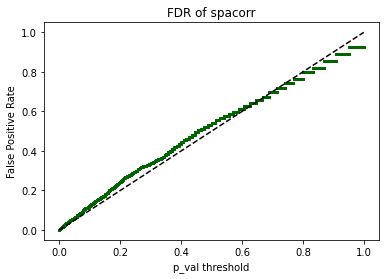

In [153]:
fdr_spc = []
for th in threshold:   
    fdr_spc.append(sum(pval_ls<th)/len(pval_ls))
plt.scatter(threshold, fdr_spc, marker='s',c='darkgreen',s=3)
plt.plot(ref,ref,'k--')
plt.xlabel('p_val threshold')
plt.ylabel('False Positive Rate')
plt.title('FDR of spacorr')


In [155]:
spacorr_25_res = pval_rescale25
spacorr_half_res = pval_half
spacorr_75_res = pval_rescale75
spacorr_full_res = pval_full

Text(0.5, 1.0, 'power (99% interaction)')

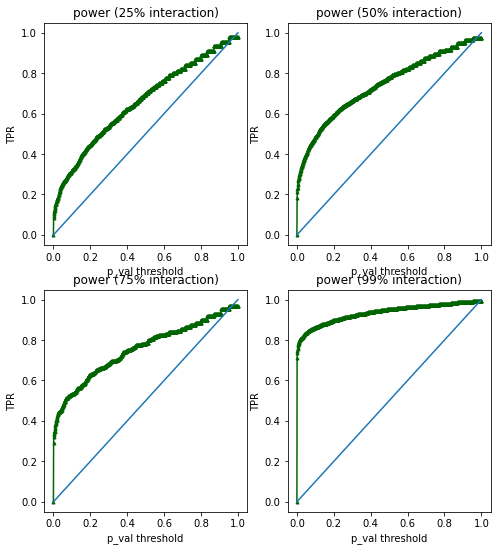

In [156]:
plt.figure(figsize=(8,9))
plt.subplot(2,2,1)
power_spc = []
for th in threshold:   
    power_spc.append(sum(spacorr_25_res<th)/len(spacorr_25_res))
plt.plot(threshold, power_spc, marker='^',c='darkgreen',markersize=3)
plt.plot(ref,ref)
plt.xlabel('p_val threshold')
plt.ylabel('TPR')
plt.title('power (25% interaction)')
plt.subplot(2,2,2)
power_spc = []
for th in threshold:   
    power_spc.append(sum(spacorr_half_res<th)/len(spacorr_half_res))
plt.plot(threshold, power_spc, marker='^',c='darkgreen',markersize=3)
plt.plot(ref,ref)
plt.xlabel('p_val threshold')
plt.ylabel('TPR')
plt.title('power (50% interaction)')

plt.subplot(2,2,3)
power_spc = []
for th in threshold:   
    power_spc.append(sum(spacorr_75_res<th)/len(spacorr_75_res))
plt.plot(threshold, power_spc, marker='^',c='darkgreen',markersize=3)
plt.plot(ref,ref)
plt.xlabel('p_val threshold')
plt.ylabel('TPR')
plt.title('power (75% interaction)')

plt.subplot(2,2,4)
power_spc = []
for th in threshold:   
    power_spc.append(sum(spacorr_full_res<th)/len(spacorr_full_res))
plt.plot(threshold, power_spc, marker='^',c='darkgreen',markersize=3)
plt.plot(ref,ref)
plt.xlabel('p_val threshold')
plt.ylabel('TPR')
plt.title('power (99% interaction)')

Text(0.5, 1.0, 'ROC (99% interaction): 0.863')

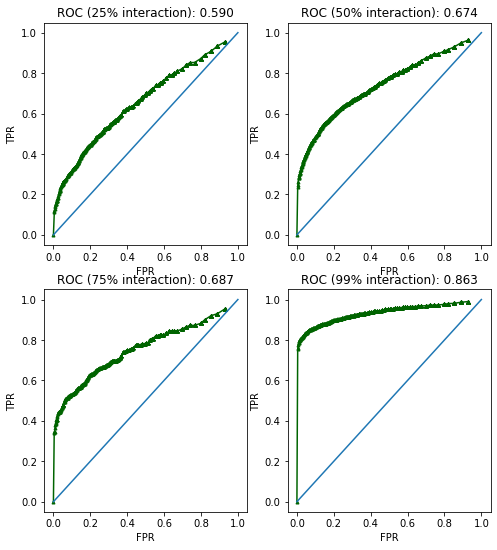

In [158]:
from sklearn import metrics

plt.figure(figsize=(8,9))
plt.subplot(2,2,1)
power_spc = []
for th in fdr_spc:   
    power_spc.append(sum(spacorr_25_res<th)/len(spacorr_25_res))
plt.plot(fdr_spc, power_spc, marker='^',c='darkgreen',markersize=3)
plt.plot(ref,ref)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC (25% interaction): {:.3f}'.format(metrics.auc(fdr_spc, power_spc)))
plt.subplot(2,2,2)
power_spc = []
for th in fdr_spc:   
    power_spc.append(sum(spacorr_half_res<th)/len(spacorr_half_res))
plt.plot(fdr_spc, power_spc, marker='^',c='darkgreen',markersize=3)
plt.plot(ref,ref)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC (50% interaction): {:.3f}'.format(metrics.auc(fdr_spc, power_spc)))

plt.subplot(2,2,3)
power_spc = []
for th in fdr_spc:   
    power_spc.append(sum(spacorr_75_res<th)/len(spacorr_75_res))
plt.plot(fdr_spc, power_spc, marker='^',c='darkgreen',markersize=3)
plt.plot(ref,ref)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC (75% interaction): {:.3f}'.format(metrics.auc(fdr_spc, power_spc)))

plt.subplot(2,2,4)
power_spc = []
for th in fdr_spc:   
    power_spc.append(sum(spacorr_full_res<th)/len(spacorr_full_res))
plt.plot(fdr_spc, power_spc, marker='^',c='darkgreen',markersize=3)
plt.plot(ref,ref)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC (99% interaction): {:.3f}'.format(metrics.auc(fdr_spc, power_spc)))

In [194]:

# import anndata as ann
# import scanpy as sc
# import matplotlib.pyplot as plt
# import time

# adata_10k = sc.read_h5ad('/home/yoyo/1_spatial/2_BGI_mouse/E16.5_E1S3.MOSTA.h5ad')

# adata_10k.raw = adata_10k

# lens = [10000, 7500, 5000, 2500, 1000]
# i=0

# bdata = adata_10k[:1000,]

# extract_lr(bdata, 'mouse', min_cell=1)      # find overlapping LRs from CellChatDB

# db2=pd.concat((bdata.uns['ligand'],bdata.uns['receptor']), axis=1)

# adata_10k.obs[['row','col']] = adata_10k.obsm['spatial']

# times1 = []

# lens = [10000, 7500, 5000, 2500, 1000]

# times1

# for k in np.arange(1,5,1):
#     print(lens[k])
#     adata_k = adata_10k[:lens[k],]
#     t0 = time.time()
#     for i in db2.index[:5]:
#         l = db2.loc[i].dropna()
#         res=spatialcorr.run_test(adata_k,
#                              np.hstack((l)),
#                              bandwidth=10)
#     t1 = time.time()
#     times1.append(t1-t0)
#     print(times1)

# res=spatialcorr.run_test(bdata,
#                              np.hstack((l)),
#                              bandwidth=10)